In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import preprocessing

In [3]:
X_train = np.array([[ 1., -1.,  2.],
...                 [ 2.,  0.,  0.],
...                 [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [4]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [5]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [6]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [7]:
print("mean:", X_scaled.mean(axis=0),", std:",  X_scaled.std(axis=0))

mean: [0. 0. 0.] , std: [1. 1. 1.]


In [8]:
X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [9]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [10]:
min_max_scaler.scale_

array([0.5       , 0.5       , 0.33333333])

In [11]:
min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

In [12]:
X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [14]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

In [15]:
max_abs_scaler.scale_

array([2., 1., 2.])

In [16]:
X = [[ 1., -1.,  2.],
...  [ 2.,  0.,  0.],
...  [ 0.,  1., -1.]]

X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [17]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OrdinalEncoder()

In [18]:
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

In [19]:
enc = preprocessing.OrdinalEncoder()
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

In [20]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

In [1]:
# Exercise 1: Load the dataset WA_Fn-UseC_-Telco-Customer-Churn.csv provided. Perform transformations on it so it is prepared to build a model (scaling the 
# numerical data and the cathegorical features transformed in numerical integer labels. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') # load the dataset
df.head() # show the first 5 rows of the dataset

X = df.drop('Churn', axis=1) # drop the target variable from the dataset 
y = df['Churn'] # the target variable is the Churn column

X_numerical = X.select_dtypes(include=['int64', 'float64']) # select the numerical features from the dataset
X_categorical = X.select_dtypes(include=['object']) # select the categorical features from the dataset

scaler = StandardScaler().fit(X_numerical) # fit the scaler on the numerical data
X_numerical_scaled = scaler.transform(X_numerical) # transform the numerical data

enc = OrdinalEncoder().fit(X_categorical) # fit the encoder on the categorical data
X_categorical_encoded = enc.transform(X_categorical) # transform the categorical data to numerical integer labels

X = np.concatenate((X_numerical_scaled, X_categorical_encoded), axis=1) # concatenate the numerical and categorical data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the data into train and test
clf = LogisticRegression(random_state=0, max_iter=8000).fit(X_train, y_train) # fit the model on the train data
clf.score(X_test, y_test) # evaluate the model on the test data


0.815471965933286

In [27]:
x_train = np.array([1,2,3])
y_train = np.array([2,3,6])
type(x_train)

numpy.ndarray

In [28]:
x_train.shape

(3,)

In [29]:
x_train = x_train.reshape(3,1)
x_train.shape

(3, 1)

(3, 1) (3,)


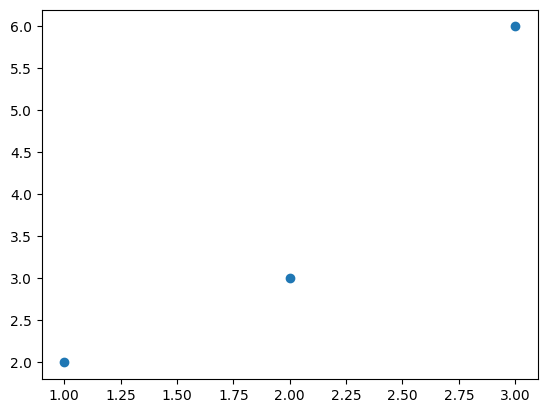

In [30]:
# Make a simple scatterplot
plt.scatter(x_train,y_train)

# check dimensions 
print(x_train.shape,y_train.shape)

<Axes: title={'center': 'A nice plot'}, xlabel='$x$', ylabel='$y$'>

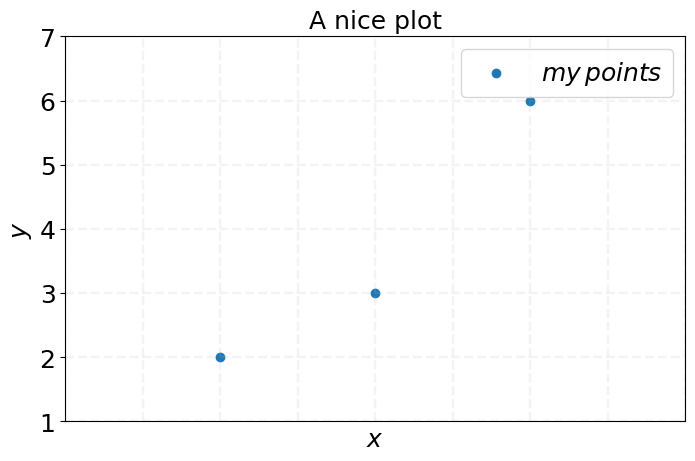

In [31]:
def nice_scatterplot(x, y, title):
    # font size
    f_size = 18
    
    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)
    
    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)
    
    # adjust size of axis label
    ax.set_xlabel(r'$x$', fontsize = f_size)
    ax.set_ylabel(r'$y$', fontsize = f_size)
    
    # set figure title label
    ax.set_title(title, fontsize = f_size)

    # you may set up grid with this 
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # make actual plot (Notice the label argument!)
    #ax.scatter(x, y, label=r'$My points$')
    #ax.scatter(x, y, label='$My points$')
    ax.scatter(x, y, label=r'$my\,points$')
    ax.legend(loc='best', fontsize = f_size);
    
    return ax

nice_scatterplot(x_train, y_train, 'A nice plot')

In [32]:
#solution
xx = np.array([[1,2,3],[4,6,8]])
xxx = xx.reshape(-1,2)
xxx.shape

(3, 2)

In [33]:
# Reshape to be a proper 2D array
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

print(x_train.shape)

(3, 1)


In [34]:
# first, compute means
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

# build the two terms
numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
denominator = np.sum((x_train - x_bar)**2)

print(numerator.shape, denominator.shape) #check shapes

() ()


In [35]:
#slope beta1
a = numerator/denominator

#intercept beta0
b = y_bar - a * x_bar

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(b, a))
print(f'The best fit is {b}')

The best-fit line is -0.33 + 2.00 * x
The best fit is -0.3333333333333335


In [36]:
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    
    # Check input array sizes
    if len(x_train.shape) < 2:
        print("Reshaping features array.")
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        print("Reshaping observations array.")
        y_train = y_train.reshape(y_train.shape[0], 1)

    # first, compute means
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    # build the two terms
    numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
    denominator = np.sum((x_train - x_bar)**2)
    
    #slope a
    a = numerator/denominator

    #intercept b
    b = y_bar - beta_1*x_bar

    return np.array([b,a])

In [58]:
# define beta_1
beta_1 = 1

x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])

coeficients = simple_linear_regression_fit(x_train, y_train)

a = coeficients[1]
b = coeficients[0]

print("The best-fit line is {1:8.6f} * x + {0:8.6f}.".format(a, b))

Reshaping features array.
Reshaping observations array.
The best-fit line is 0.666667 * x + 1.000000.


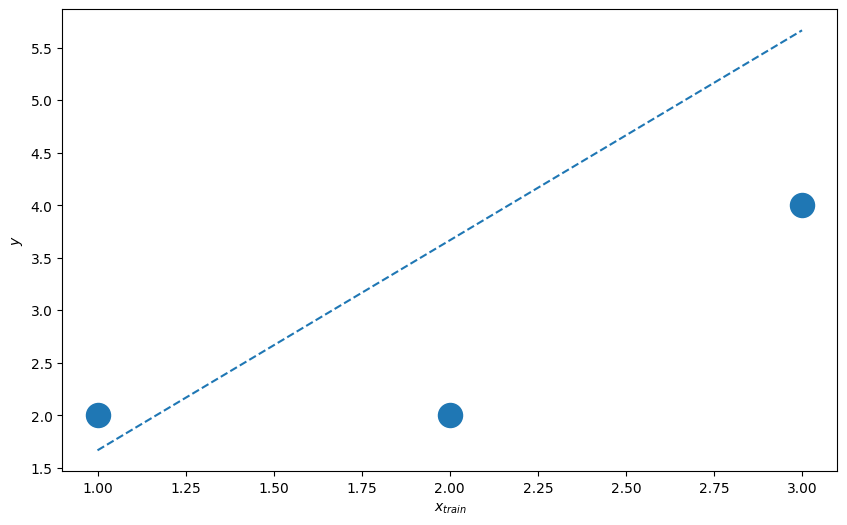

In [38]:
# %load solutions/best_fit_scatterplot.py
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

# Plot best-fit line
x_train = np.array([[1, 2, 3]]).T

best_fit = b + a * x_train

ax_scat.scatter(x_train, y_train, s=300, label='Training Data')
ax_scat.plot(x_train, best_fit, ls='--', label='Best Fit Line')

ax_scat.set_xlabel(r'$x_{train}$')
ax_scat.set_ylabel(r'$y$');

In [39]:
import statsmodels.api as sm

In [40]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# this is the same matrix as in our scratch problem!
print(X)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f'The regression coef from statsmodels are: beta_0 = {beta0_sm:8.6f} and beta_1 = {beta1_sm:8.6f}')

[[1. 1.]
 [1. 2.]
 [1. 3.]]
The regression coef from statsmodels are: beta_0 = 0.666667 and beta_1 = 1.000000


In [41]:
import warnings
warnings.filterwarnings('ignore')
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3.000
Date:                Mon, 06 Mar 2023   Prob (F-statistic):              0.333
Time:                        08:41:30   Log-Likelihood:                -2.0007
No. Observations:                   3   AIC:                             8.001
Df Residuals:                       1   BIC:                             6.199
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667      1.247      0.535      0.6

In [42]:
from sklearn import linear_model

In [43]:
# build the least squares model
toyregr = linear_model.LinearRegression()

# save regression info (parameters, etc) in results_skl
results = toyregr.fit(x_train, y_train)

# pull the beta parameters out from results_skl
beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print("The regression coefficients from the sklearn package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

The regression coefficients from the sklearn package are: beta_0 = 0.666667 and beta_1 = 1.000000


In [44]:
#we load the dataset (be sure that this file is in the same folder with the j. notebook)
df = pd.read_csv('Salary_dataset.csv')

In [45]:
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print(df.head())
X = np.array(df['YearsExperience'])
y = np.array(df['Salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [47]:
X_train

array([ 5.4,  8. ,  3. ,  5.2,  3.3,  4.6,  8.3,  6.9,  1.4, 10.6,  3.1,
        2.3,  6. ,  6.1,  3.8,  3.3,  9.1,  2.1,  1.2,  7.2,  5. ,  4.1])

In [48]:
y_train

array([ 83089., 101303.,  56643.,  66030.,  64446.,  61112., 113813.,
        91739.,  46206., 121873.,  60151.,  39892.,  81364.,  93941.,
        57190.,  54446., 105583.,  43526.,  39344.,  98274.,  67939.,
        56958.])

In [49]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# we perform the regression
lr = LinearRegression().fit(X_train, y_train)


print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.94
Linear Regression-Test set score: 0.98


In [50]:
a = lr.coef_[0] # we ahve one feature with index 0

b = lr.intercept_ # a scalar
 
print(a, "* x +", b, "= y")

9379.710491946016 * x + 26049.720267542645 = y


In [51]:
lr.predict([[20]])

array([213643.93010646])

In [52]:
a * 20 + b

213643.93010646297

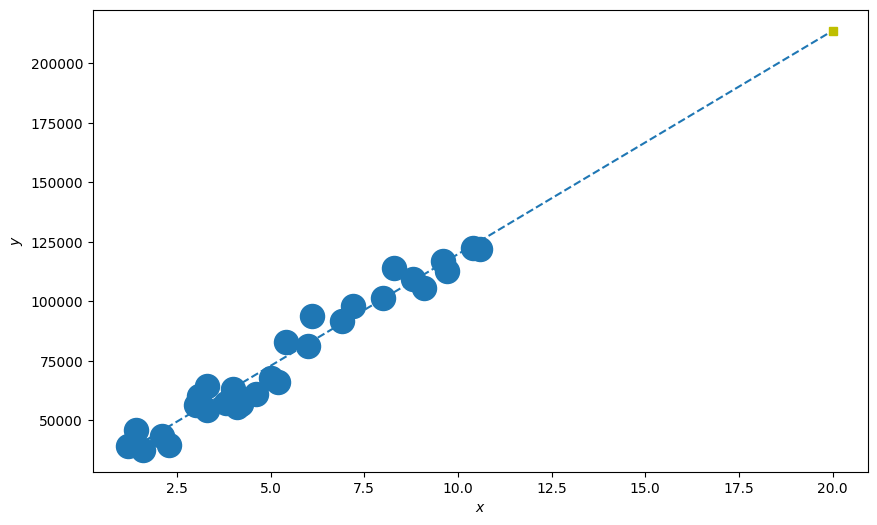

In [53]:
pred = lr.predict([[20]])
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))


x = X.T

best_fit = b + a * (np.append(x, [20]))

ax_scat.scatter(x, y, s=300, label='Training Data')
ax_scat.plot(np.append(x,[20]), best_fit, ls='--', label='Best Fit Line')

ax_scat.plot([20],pred, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$');

c:\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


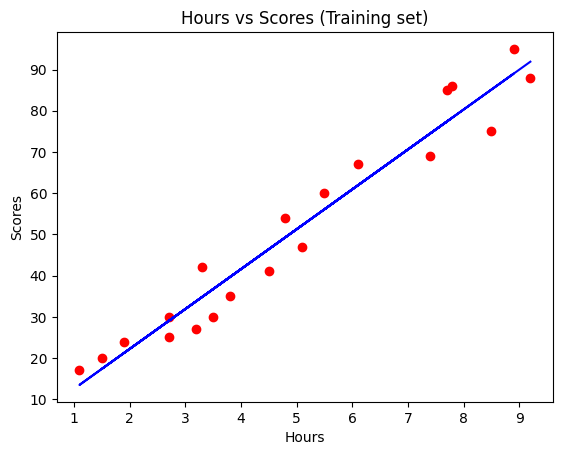

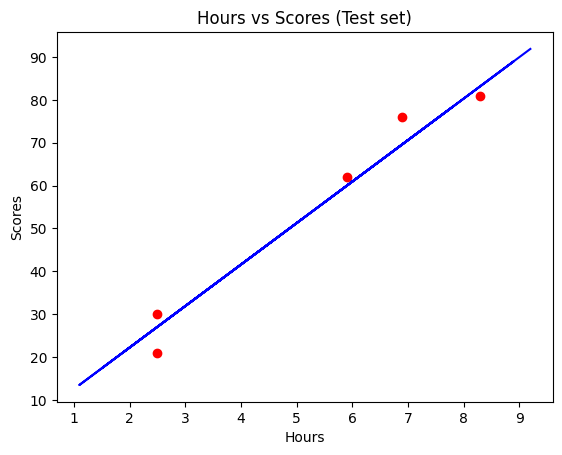

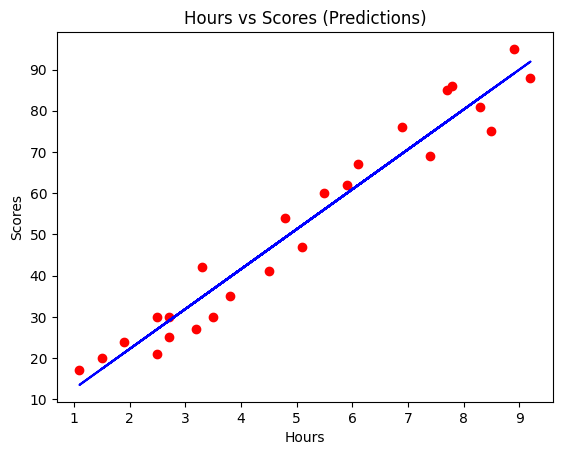

In [31]:
# Exercise 2: Download from https://www.kaggle.com/ the regression dataset: Student Study Hours. Create a model and make 3 predictions. Make some nice 
# graphics to depict the model (training set, test set, predictions). 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the dataset
df = pd.read_csv('score.csv')
df.head()

X = df.drop('Scores', axis=1)
y = df['Scores']

# split the dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LinearRegression().fit(X_train, y_train)

# make 3 predictions
clf.predict([[9.25], [8.25], [7.25]])

# make some nice graphics to depict the model (training set, test set, predictions).
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, clf.predict(X_train), color='blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# test set graphics
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, clf.predict(X_train), color='blue')
plt.title('Hours vs Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# predictions graphics
plt.scatter(X, y, color='red')
plt.plot(X, clf.predict(X), color='blue')
plt.title('Hours vs Scores (Predictions)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [22]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.95
Ridge Regression-Test set score: 0.95


In [55]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.94
Lasso Regression-Test set score: 0.98


In [56]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.94
Elastic Net-Test set score: 0.98


In [32]:
# Exercise 3: For your build previous model perform all three regularizations presented here.  
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.95
Ridge Regression-Test set score: 0.97
Lasso Regression-Training set score: 0.95
Lasso Regression-Test set score: 0.97
Elastic Net-Training set score: 0.95
Elastic Net-Test set score: 0.97
